In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78369424/scipy-optimisation-doesnt-seem-to-be-able-to-fit-correctly

In [2]:
I3 = np.array([12.5, 73.2, 99.5, 96.8, 73.2, 50, 27.1, 10.6, 3.1, 1.31, 0.40, 0.33, 0.41, 0.47, 0.55, 0.56, 0.55, 0.54])
U = np.array([951, 888, 808, 737, 683, 639, 581, 508, 437, 392, 232, 255, 201, 166, 93, 68, 4.5, 3.4])

In [57]:
def model(x, a, b, c):
    return a * (np.sin(b * x ** 2) + c/2) ** 2

In [70]:
def model(x, a, b, c):
    return a * (np.sin(b * (x - c) ** 2)) ** 2

In [71]:
xlin = np.linspace(-2*np.pi, 2*np.pi, 500)

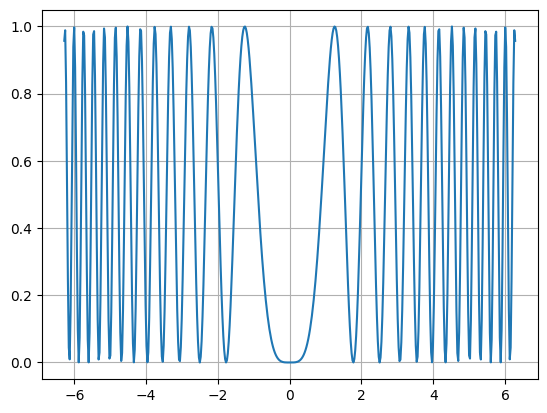

In [72]:
fig, axe = plt.subplots()
axe.plot(xlin, model(xlin, 1., 1., 0.))
axe.grid()

In [73]:
popt, pcov = optimize.curve_fit(model, U, I3, p0=[100., 1e-7, 0.])
popt, pcov

(array([1.00159221e+02, 5.18033002e-06, 2.37155715e+02]),
 array([[8.77250748e+00, 2.83827797e-07, 1.61650585e+01],
        [2.83827797e-07, 5.98205224e-14, 3.18920570e-06],
        [1.61650585e+01, 3.18920570e-06, 1.87200257e+02]]))

In [74]:
Ulin = np.linspace(U.min(), U.max(), 200)
I3hat = model(Ulin, *popt)

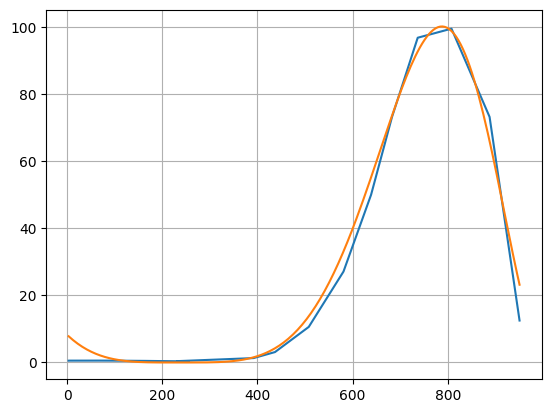

In [75]:
fig, axe = plt.subplots()
axe.plot(U, I3)
axe.plot(Ulin, I3hat)
axe.grid()